In [96]:
#imprting the necessary packages
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import tensorflow.keras
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical

In [53]:
#reading the data from drive
root = 'C:\\Users\\smannem\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration'
train_dir = pathlib.Path(root + '\Train')
test_dir = pathlib.Path(root + '\Test')

In [54]:
#counting the number of images in train and tes
img_cnt_train = len(list(train_dir.glob('*/*.jpg')))
img_cnt_test = len(list(test_dir.glob('*/*.jpg')))
print(img_cnt_train)
print(img_cnt_test)

2239
118


In [55]:
#setting batchsize and image hight, width
b_size = 32
img_hgt = 180
img_wdt = 180

In [56]:
#preparing the training, test, validation dataframes
train_df = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset = "training", 
    seed=123,
    image_size=(img_hgt, img_wdt), 
    batch_size = b_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [57]:
test_df = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_hgt, img_wdt), 
    batch_size = b_size)

Found 118 files belonging to 9 classes.


In [58]:
val_df = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset = "validation", 
    seed=123,
    image_size=(img_hgt, img_wdt), 
    batch_size = b_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [59]:
#getting the column names
cl_names = train_df.class_names
print(cl_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


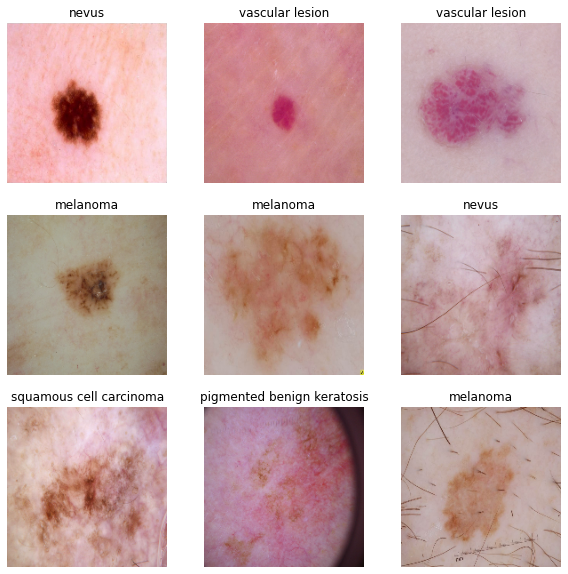

In [65]:
#visualising the images
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for image,label in train_df.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(cl_names[label[i]])
        plt.axis("off")

In [70]:
attune = tf.data.experimental.AUTOTUNE
train_df = train_df.cache().shuffle(1000).prefetch(buffer_size=attune)
val_ds = val_df.cache().prefetch(buffer_size=attune)

In [72]:

preprocessinf_layers =[
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape =(180,180,3))
]

In [79]:
#creating a CNN used sigmoid as the activation functiona and dense to 512

input_shape = (180,180,3)
lr= 1e-5
init = 'normal'
activ ='relu'
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./245, input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512, activation = 'relu'))

model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_3 (ModuleWra  (None, 178, 178, 32)     896       
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 176, 176, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 88, 88, 32)       0         
 pper)                                                           
                                                                 
 module_wrapper_6 (ModuleWra  (None, 86, 86, 64)       18496     
 pper)                                                

In [83]:
#compiling the model
optimizer ='adam',
loss_fn = 'binary_crossentropy'
model.compile(optimizer=optimizer,
             loss=loss_fn,
             metrics = ['accuracy'])

In [101]:
#training the model
history = model.fit(train_df,epochs = 30,batch_size = 32,validation_data = val_df,)

Epoch 1/30


AttributeError: in user code:

    File "C:\Users\smannem\.env\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\smannem\.env\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\smannem\.env\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\smannem\.env\lib\site-packages\keras\engine\training.py", line 893, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)

    AttributeError: 'tuple' object has no attribute 'minimize'


In [98]:
#Visualizing the performance of the model
acc = history.history['accuracy']
val_acc = history.historty['val_accuracy']
loss = history.history['val_loss']
epochs_range = range(epochs)


plt.figutr(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, loss, label='Training Accuracy')
plt.plot(epochs_range, val_loss, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.figutr(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_acc, label = 'Validation loss')
plt.title('Training and Validation loss')
plt.shoW()

NameError: name 'history' is not defined

In [ ]:
loss, accuracy = model.evalute(train_ds, verbose=1)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print(loss, accuracy)
print(loss_v, accuracy_v)

In [ ]:
train_dir = pathlib.Path(root_path + '/Train')
import Augmentor
for i in class_names:
for i in class_names:
    p=Augmentor.Pipeline(train_dir +i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

In [ ]:
image_count_train = len(list(train_dir.glob('*/output/*.jpg')))
print(image_count_train)


In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list,lession_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns = ['path', 'Label'])

In [ ]:
#creating a CNN used sofmax as the activation functiona and dense to 128 also used dropout

input_shape = (180,180,3)
lr= 1e-5
init = 'normal'
activ ='relu'

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./245, input_shape = input_shape)
model.add(Conv2D(32, kernal_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(32, kernal_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(BatchNormalization()))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
          
model.add(Conv2D(64, kernal_size=(3,3), activation = 'relu'))
model.add(Conv2D(64, kernal_size=(3,3), activation = 'relu'))
model.add(BatchNormalization()))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernal_size=(3,3), activation = 'relu'))
model.add(BatchNormalization()))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)
model.add(Activation('softmax'))

model.summary()

In [ ]:
#compiling the model
optimizer ='adam',
loss_fn = 'binary_crossentropy'
model.compile(optimizer=optimizer,
             loss=liss_fn,
             metrics = ['accuracy'])

In [ ]:
#training the model
histry = model.fit(
    train_df,
    batch_size = 32, 
    validation_data = val_df,
    epochs = 30

)


In [ ]:
#Visualizing the performance of the model
acc = history.history['accuracy']
val_acc = history.historty['val_accuracy']
loss = history.history['val_loss']
epochs_range = range(epochs)


plt.figutr(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, loss, label='Training Accuracy')
plt.plot(epochs_range, val_loss, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.figutr(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_acc, label = 'Validation loss')
plt.title('Training and Validation loss')
plt.shoW()

In [ ]:
#getting the loss and accuracy
loss, accuracy = model.evalute(train_ds, verbose=1)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print(loss, accuracy)
print(loss_v, accuracy_v)